In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Column names based on the adult.names file
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]

# Load the training dataset
df_train = pd.read_csv("adult.data", header=None, names=columns, na_values="?", skipinitialspace=True)


In [5]:
# Load the test dataset (note: skiprows=1 to skip header, if present)
df_test = pd.read_csv("adult.test", header=0, names=columns, na_values="?", skipinitialspace=True, skiprows=1)

# Sometimes the labels have a period, so we can clean it
df_test['income'] = df_test['income'].str.replace('.', '', regex=False)


In [6]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
3,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## Checking Missing Values (Training data)

In [8]:
# Basic info
print("\nTraining Data Info:")
df_train.info()

print("\nMissing values in training data:")
print(df_train.isnull().sum())



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Missing values in training data:
age                  0
workclass      

In [9]:
missing_rows = df_train[df_train.isnull().any(axis=1)]
print(f"Total rows with at least one missing value: {len(missing_rows)}")

Total rows with at least one missing value: 2399


## Income Distribution in Training Set

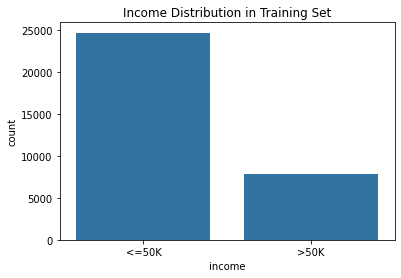

In [10]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x="income", data=df_train)
plt.title("Income Distribution in Training Set")
plt.show()

## Checking Outliers for Numeric Data

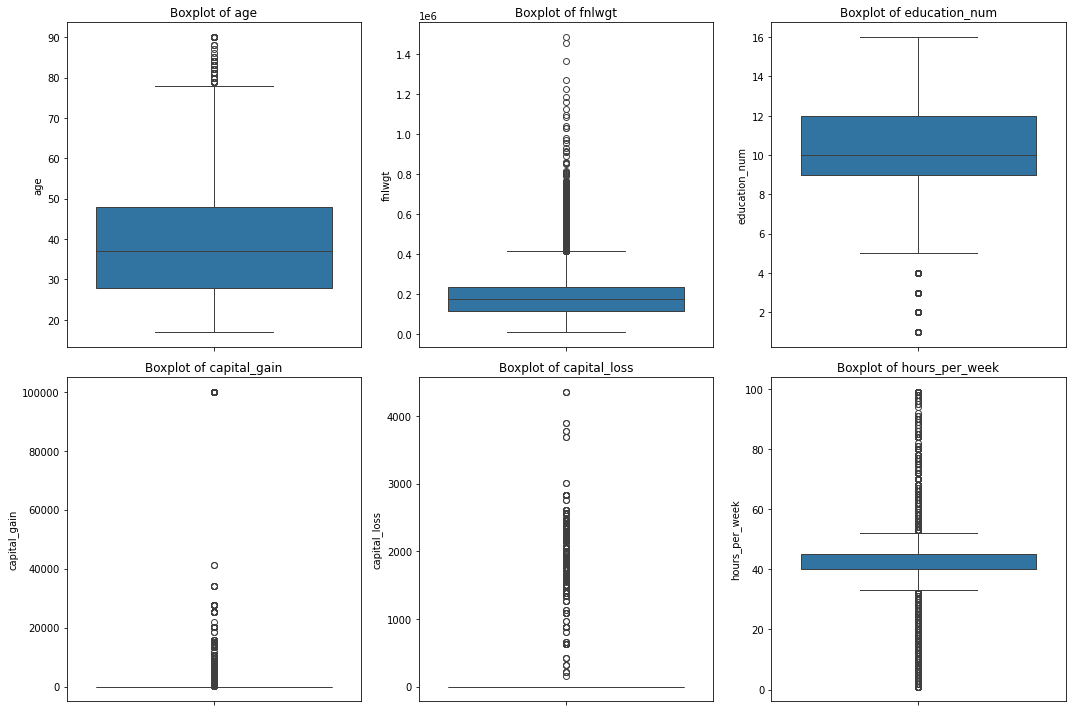

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns to check
numeric_cols = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

# Create boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_train[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


## Save Training and Testing Dataset into csv

In [12]:
# Save training dataset
df_train.to_csv("adult_train.csv", index=False)

# Save test dataset
df_test.to_csv("adult_test.csv", index=False)